In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
x = iris.data
y = iris.target


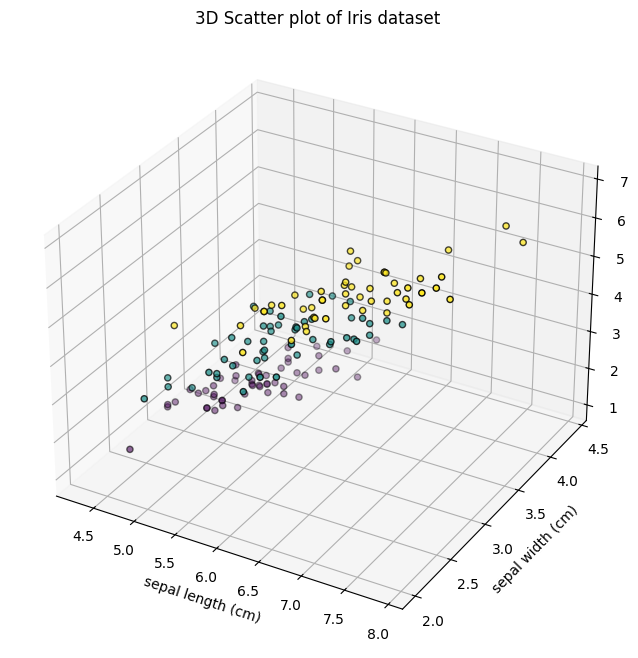

In [15]:
from mpl_toolkits.mplot3d import Axes3D

# Create a scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y, cmap='viridis', edgecolor='k')
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_zlabel(iris.feature_names[2])
ax.set_title('3D Scatter plot of Iris dataset')
plt.show()

In [16]:
X=np.ones((x.shape[0],x.shape[1]+1))

In [18]:
X[:,1:]=x

In [20]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def hypothesis(x, w):
    return sigmoid(np.dot(x, w))


In [22]:
def cost_function(x, y, w):
    m = len(y)
    h = hypothesis(x, w)
    cost = (1/(2*m)) * np.sum((h - y) ** 2)
    return cost

In [23]:
def gradient(x, y, w):
    m = len(y)
    h = hypothesis(x, w)
    grad = (1/m) * np.dot(x.T, (h - y))
    return grad

In [38]:
def gradient_descent(x, y, w, learning_rate, epochs):
    cost_history = []
    for epoch in range(epochs):
        grad = gradient(x, y, w)
        w = w - learning_rate * grad
        cost = cost_function(x, y, w)
        cost_history.append((epoch, cost))
        if epoch % 100 == 0:
            print(f'Epoch {epoch}: Cost {cost}')
    return w, cost_history


Epoch 0: Cost 0.3692742010765587
Epoch 100: Cost 0.3507459467304757
Epoch 200: Cost 0.33813955280526736
Epoch 300: Cost 0.32951905727123426
Epoch 400: Cost 0.3236003936447492
Epoch 500: Cost 0.31953817081512437
Epoch 600: Cost 0.31677138200611277
Epoch 700: Cost 0.3149222744949152
Epoch 800: Cost 0.31373212541215323
Epoch 900: Cost 0.313020631013641
Epoch 1000: Cost 0.3126600213325426
Epoch 1100: Cost 0.3125583343802668
Epoch 1200: Cost 0.31264843432371947
Epoch 1300: Cost 0.3128806793576291
Epoch 1400: Cost 0.3132179444163249
Epoch 1500: Cost 0.3136321878814388
Epoch 1600: Cost 0.3141020469962964
Epoch 1700: Cost 0.3146111294237069
Epoch 1800: Cost 0.31514678296915694
Epoch 1900: Cost 0.3156991984235563
Epoch 2000: Cost 0.3162607475983356
Epoch 2100: Cost 0.3168254895157943
Epoch 2200: Cost 0.31738879825675453
Epoch 2300: Cost 0.31794707981036713
Epoch 2400: Cost 0.31849755472163643
Epoch 2500: Cost 0.3190380898638894
Epoch 2600: Cost 0.3195670672303542
Epoch 2700: Cost 0.320083280867

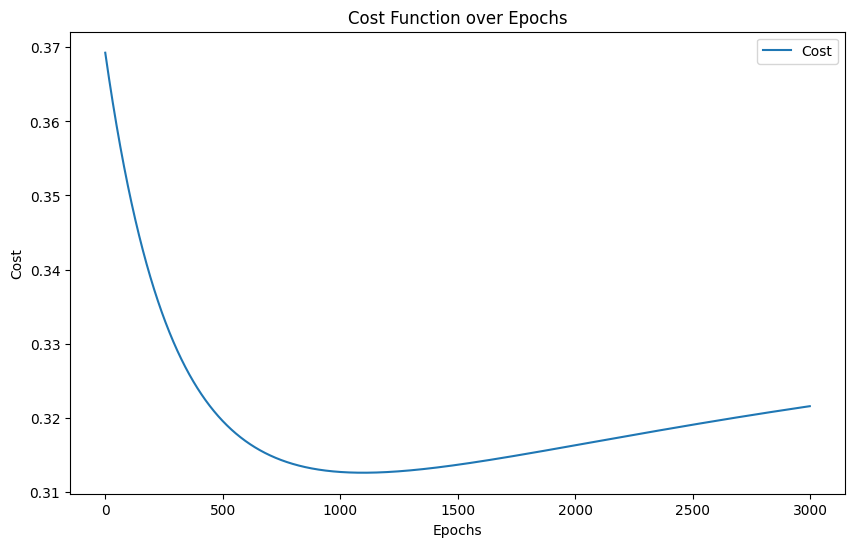

In [54]:
# Example usage:
w_initial = np.zeros((X.shape[1],))
w_initial[0] = 1
learning_rate = 0.0001
epochs = 3000
w_final, cost_history = gradient_descent(X, y, w_initial, learning_rate, epochs)

# Plot the epochs and cost history
epochs_list, cost_list = zip(*cost_history)
plt.figure(figsize=(10, 6))
plt.plot(epochs_list, cost_list, label='Cost')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function over Epochs')
plt.legend()
plt.show()



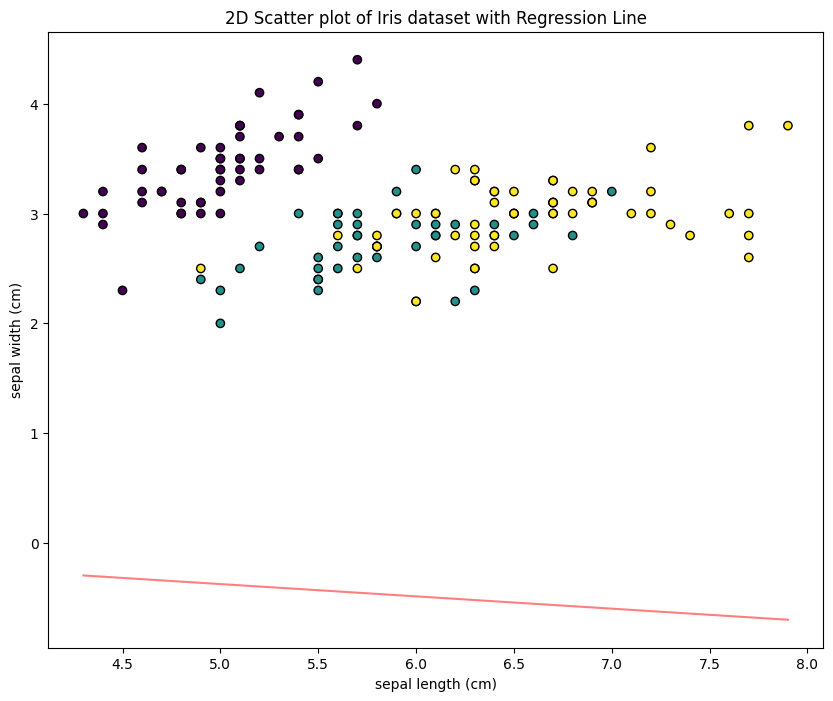

In [53]:
# Create a 2D scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', edgecolor='k')

# Fit the regression line
w_final = np.linalg.lstsq(X, y, rcond=None)[0]
x_range = np.linspace(x[:, 0].min(), x[:, 0].max(), 100)
y_range = w_final[0] + w_final[1] * x_range

# Plot the regression line
plt.plot(x_range, y_range, color='red', alpha=0.5)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('2D Scatter plot of Iris dataset with Regression Line')
plt.show()
